<a href="https://colab.research.google.com/github/kittyofheaven/Webcam-Stress-Meter/blob/main/emotions_model_for_WSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Webcam stress meter

In [ ]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hazelhandrata","key":"2ebb76d4c8985c51b5cfac6ba282565e"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# downloading datasets
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 98% 118M/121M [00:05<00:00, 23.6MB/s]
100% 121M/121M [00:06<00:00, 20.8MB/s]


In [5]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

Modeling start

In [7]:
# import stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preprocess
from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array , load_img
from keras.preprocessing.image import ImageDataGenerator 

In [8]:
from keras.applications.mobilenet import MobileNet, preprocess_input # i wanna use mobilenet bcs its lightweight 
from keras.losses import categorical_crossentropy

In [9]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 2s 0us/step


In [11]:
# compiling
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [14]:
# Train data preparation
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/images/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [16]:
# Validation data preparation
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/images/validation", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7066 images belonging to 7 classes.


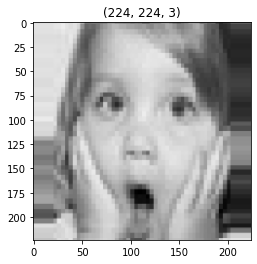

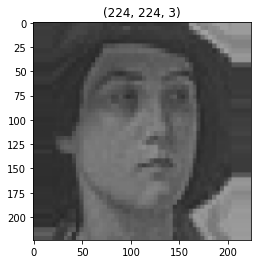

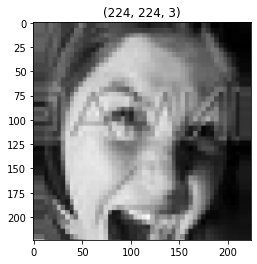

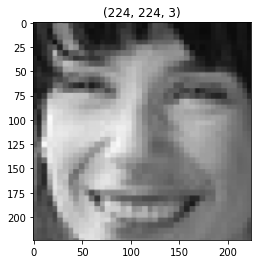

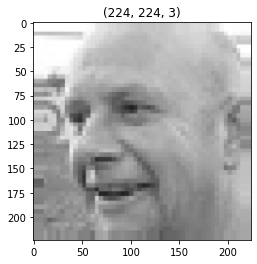

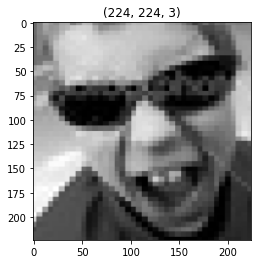

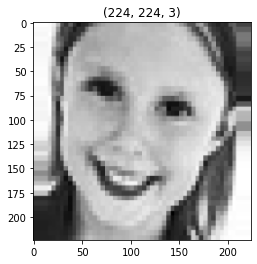

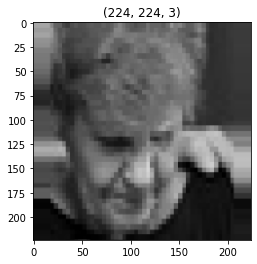

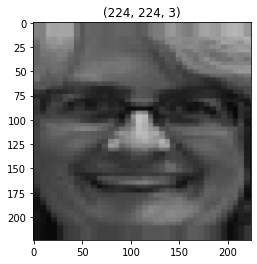

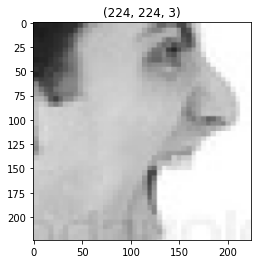

In [17]:
# picking up a sample data
t_img , label = train_data.next()

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

plotImages(t_img, label)

In [19]:
## early stop & checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 100, verbose= 1, mode='auto')

#check point
mc = ModelCheckpoint(filepath="model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

# model train !!!!!!!
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 15, 
                           epochs= 1000, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/1000
15/15 [==============================] - ETA: 0s - loss: 7.1935 - accuracy: 0.5688
Epoch 1: val_accuracy improved from -inf to 0.55859, saving model to model.h5
15/15 [==============================] - 5s 362ms/step - loss: 7.1935 - accuracy: 0.5688 - val_loss: 9.2654 - val_accuracy: 0.5586
Epoch 2/1000
15/15 [==============================] - ETA: 0s - loss: 7.3797 - accuracy: 0.5958
Epoch 2: val_accuracy did not improve from 0.55859
15/15 [==============================] - 5s 344ms/step - loss: 7.3797 - accuracy: 0.5958 - val_loss: 11.9019 - val_accuracy: 0.4570
Epoch 3/1000
15/15 [==============================] - ETA: 0s - loss: 8.4111 - accuracy: 0.5708
Epoch 3: val_accuracy did not improve from 0.55859
15/15 [==============================] - 6s 402ms/step - loss: 8.4111 - accuracy: 0.5708 - val_loss: 12.7776 - val_accuracy: 0.4648
Epoch 4/1000
15/15 [==============================] - ETA: 0s - loss: 7.9552 - accuracy: 0.5833
Epoch 4: val_accuracy did not improve fro